<a href="https://colab.research.google.com/github/atulsnjena/Data-Science-AI/blob/main/House%20Price%20Prediction/Surya_Narayan_Jena_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents
- Importing Libraries
- Data Loading
- Data Inspecting
- EDA
- Data Preprocessing
- Linear Regression
- Decision Tree Regressor
- KNeighborsRegressor
- RandomForestRegressor
- XGBoost

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,DMatrix
from scipy import stats

# Data Loading

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Inspecting

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
len(df.columns)

81

# EDA

We can see a lot of columns that have very low corelation with sales price hence we can drop them.

## Mean SalePrice in each Neighborhood

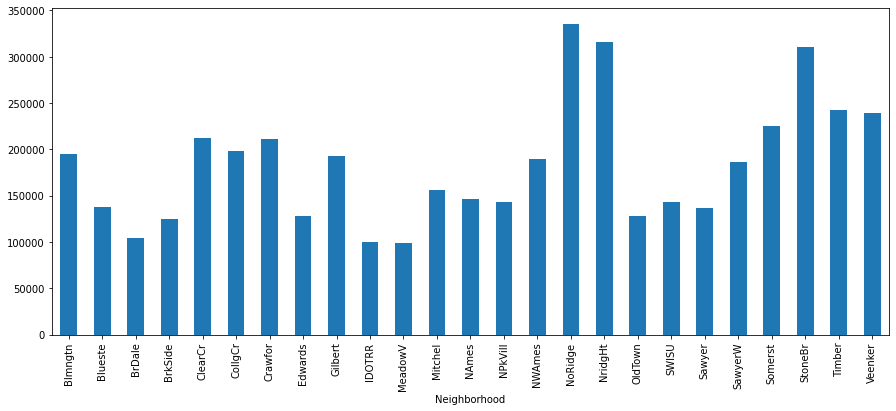

In [8]:
fig, ax = plt.subplots(figsize=(15,6))
df.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')

### We see that house prices are higher in NoRidge, Nridght, StoneBr than other places.

## Frequency of House in Neighborhoods

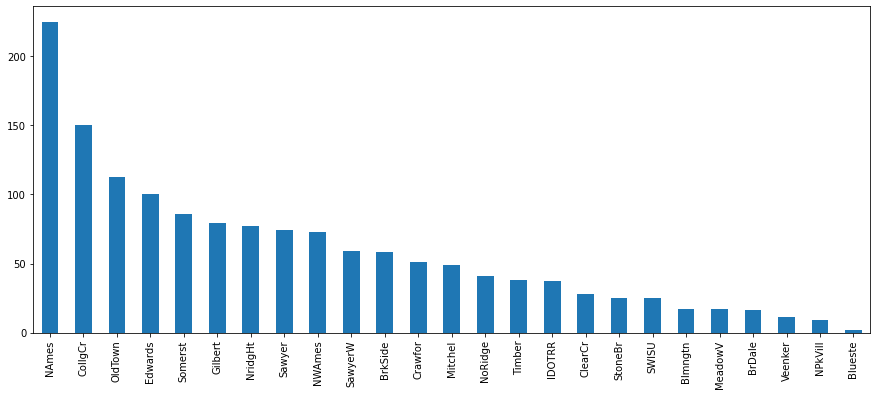

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
df['Neighborhood'].value_counts().plot(kind = 'bar')

### Names has more houses for Sale than most other neighborhoods


## Mean Sale Price by HouseStyle

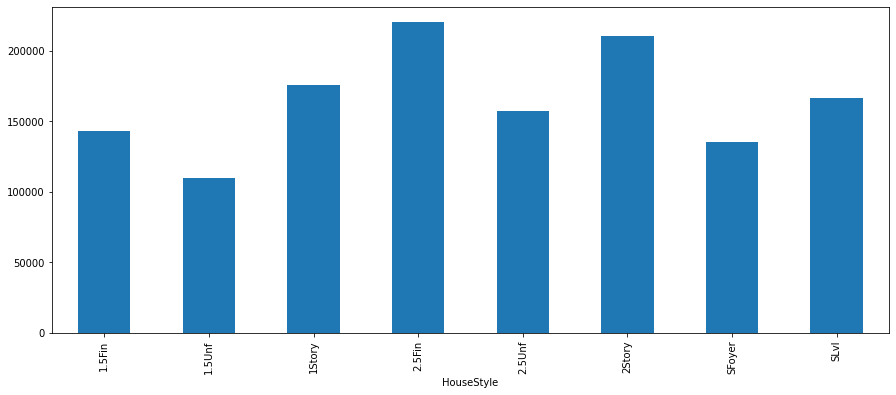

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
df.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')

### Prices of 2.5Fin and 2Story are higher.

## Frequency of HouseStyle 

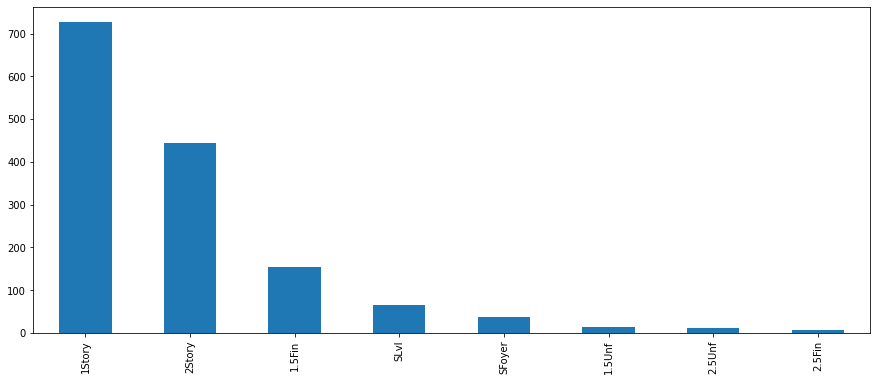

In [11]:
fig, ax = plt.subplots(figsize=(15,6))
df['HouseStyle'].value_counts().plot(kind = 'bar')

### Most houses for sale are 1 story

## No of Houses based on YearBuilt

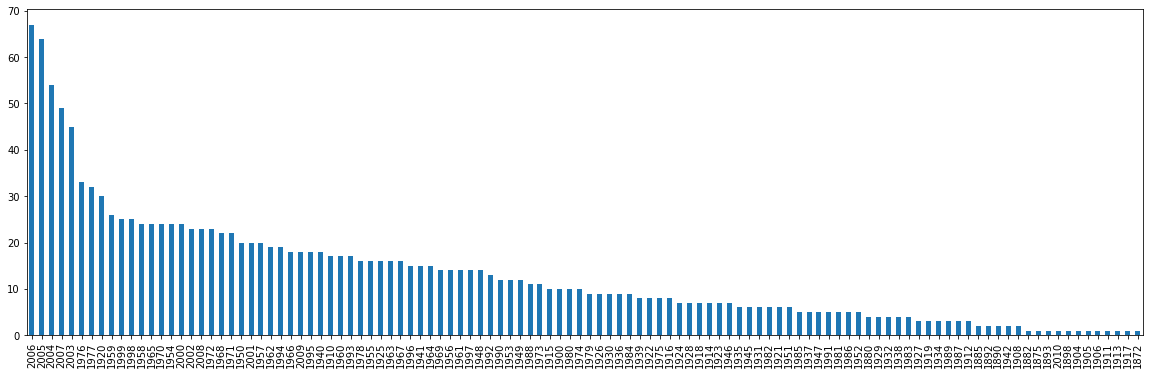

In [12]:
fig, ax = plt.subplots(figsize=(20,6))
df['YearBuilt'].value_counts().plot(kind = 'bar')

## Yearbuilt and SalePrice Plot 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'aspect'
  **contour_kws,


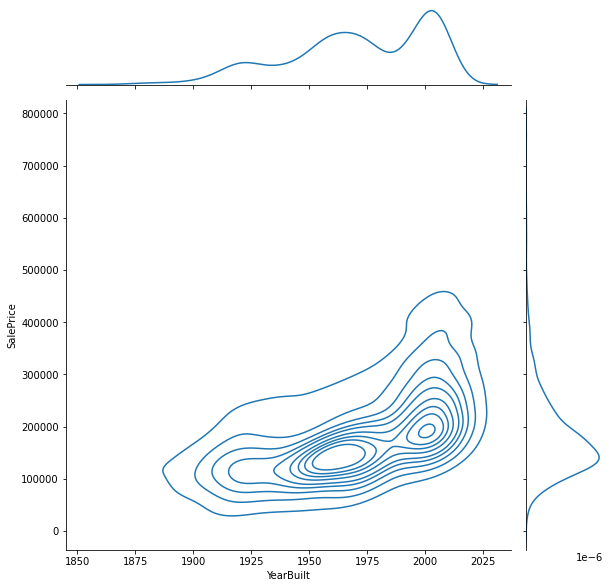

In [13]:
sns.jointplot(data=df, x="YearBuilt", y="SalePrice", kind="kde", height=8.27, aspect=11.7/8.27)

### Houses Built in between 1990 & 2005 are higher priced.

## HouseStyle and SalePrice Plot

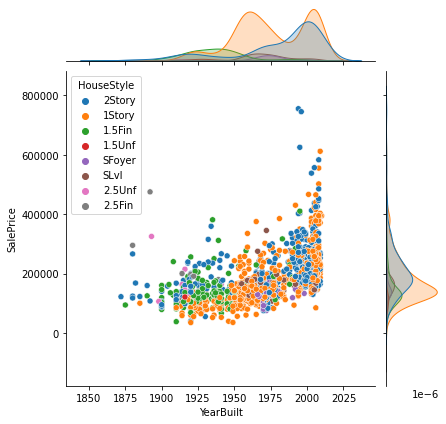

In [14]:
sns.jointplot(data=df, x="YearBuilt", y="SalePrice",hue="HouseStyle", kind="scatter")

# Data Preprocessing

In [15]:
null_df = pd.DataFrame(df.isna().sum())
null_df[null_df[0] != 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


We see a lot of null values in some columns that can be droped

In [16]:
df = df.drop('PoolQC',axis=1)
df = df.drop('Fence',axis=1)
df = df.drop('MiscFeature',axis=1)
df = df.drop('Alley',axis=1)
df = df.drop('FireplaceQu',axis=1)
df = df.drop('LotFrontage',axis=1)

In [17]:
null_df = pd.DataFrame(df.isna().sum())
null_df[null_df[0] != 0]

,0
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1
GarageType,81
GarageYrBlt,81


Lets Drop the rest of the Null Values

In [18]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

We also saw a lot of object type Features that needs to be Encoded.

In [20]:
le = LabelEncoder()
for col, value in df.items():
  if(df[col].dtype==np.dtype('O')):
    column = col
    df[col] = le.fit_transform(df[col].astype(str))

In [21]:
df.corr().abs()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.016725,0.007394,0.036083,0.006018,0.033823,0.015138,0.013866,0.062311,0.005724,0.012844,0.016067,0.002358,0.016536,0.005109,0.044455,0.011850,0.023595,0.028434,0.040482,0.030305,0.029797,0.039903,0.050936,0.051038,0.002567,0.015349,0.006208,0.063816,0.010862,0.020151,0.004980,0.004919,0.049618,0.004908,0.010196,0.018637,0.039224,0.009265,0.010435,0.023091,0.009750,0.002866,0.047958,0.001067,0.010210,0.028333,0.000334,0.013197,0.041290,0.013834,0.001430,0.022852,0.000368,0.017839,0.000503,0.003114,0.010020,0.009797,0.013658,0.002990,0.010109,0.018115,0.032801,0.005332,0.005106,0.043766,0.000904,0.059455,0.002206,0.020939,0.002241,0.014868,0.000839,0.030473
MSSubClass,0.016725,1.000000,0.019852,0.134158,0.020591,0.101590,0.004685,0.023965,0.063066,0.012477,0.020367,0.029662,0.045450,0.754404,0.400737,0.051690,0.098153,0.056456,0.038513,0.123296,0.031850,0.082190,0.136680,0.036362,0.031333,0.029122,0.004914,0.075616,0.055934,0.001798,0.044428,0.013231,0.069053,0.055059,0.079329,0.141025,0.263613,0.068728,0.006384,0.098242,0.055732,0.258787,0.306709,0.019990,0.068782,0.011317,0.000151,0.117720,0.197520,0.065699,0.239177,0.008151,0.014514,0.025542,0.024752,0.117953,0.082040,0.009522,0.006872,0.070278,0.004023,0.008049,0.011234,0.010175,0.000359,0.022598,0.041391,0.022748,0.010199,0.021512,0.016283,0.021591,0.011012,0.011692,0.079599
MSZoning,0.007394,0.019852,1.000000,0.026123,0.100472,0.057472,0.024760,0.001048,0.020602,0.021658,0.262624,0.032014,0.034218,0.000303,0.118250,0.172775,0.189902,0.325488,0.178559,0.013325,0.007029,0.006036,0.022059,0.034057,0.061878,0.195937,0.096381,0.253498,0.128791,0.015496,0.045659,0.027419,0.040978,0.029387,0.025796,0.036063,0.074907,0.046394,0.149369,0.060511,0.091033,0.035350,0.057316,0.055047,0.070431,0.020999,0.010224,0.206548,0.135167,0.001035,0.068867,0.135165,0.031440,0.101504,0.006978,0.134016,0.273974,0.161161,0.156538,0.195546,0.161552,0.092109,0.117913,0.008916,0.142107,0.144068,0.001516,0.022453,0.002750,0.002839,0.011369,0.023209,0.092456,0.003117,0.163809
LotArea,0.036083,0.134158,0.026123,1.000000,0.215095,0.162595,0.169102,0.009710,0.120209,0.458152,0.044572,0.019012,0.021263,0.204186,0.035477,0.090451,0.001415,0.005022,0.001681,0.069479,0.154279,0.002558,0.007625,0.001761,0.096727,0.050336,0.009181,0.020026,0.057233,0.010486,0.143516,0.055793,0.210148,0.066609,0.110493,0.014589,0.267188,0.087821,0.005351,0.034059,0.039539,0.288502,0.047773,0.009729,0.255445,0.160687,0.046420,0.115727,0.006052,0.120369,0.012611,0.056815,0.185654,0.009886,0.263061,0.130042,0.025700,0.102519,0.138228,0.168630,0.021881,0.030785,0.015528,0.167822,0.084942,0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,0.012066,0.014410,0.031465,0.254757
Street,0.006018,0.020591,0.100472,0.215095,1.000000,0.004162,0.141519,0.001675,0.022597,0.206116,0.022545,0.079248,0.002211,0.006154,0.047829,0.074926,0.045259,0.036120,0.081711,0.027194,0.007698,0.010513,0.007685,0.004799,0.021509,0.062956,0.020923,0.034879,0.039073,0.017089,0.055693,0.023605,0.005097,0.070718,0.045189,0.026807,0.004796,0.006925,0.046278,0.104057,0.033231,0.002025,0.045046,0.006354,0.037095,0.042928,0.015347,0.042013,0.024649,0.036659,0.010485,0.

We see a lot of low corelation features that can be removed.

In [22]:
corr_matrix = df.corr().abs()

In [23]:
sp_corr = corr_matrix['SalePrice']

In [24]:
sp_corr

Id               0.030473
MSSubClass       0.079599
MSZoning         0.163809
LotArea          0.254757
Street           0.042106
                   ...   
MoSold           0.041310
YrSold           0.020451
SaleType         0.045856
SaleCondition    0.202301
SalePrice        1.000000
Name: SalePrice, Length: 75, dtype: float64

In [25]:
to_drop=[]
for i in range(len(sp_corr)):
  if sp_corr[i] < 0.3:
    to_drop.append(i)
df = df.drop(df.columns[to_drop],axis=1)

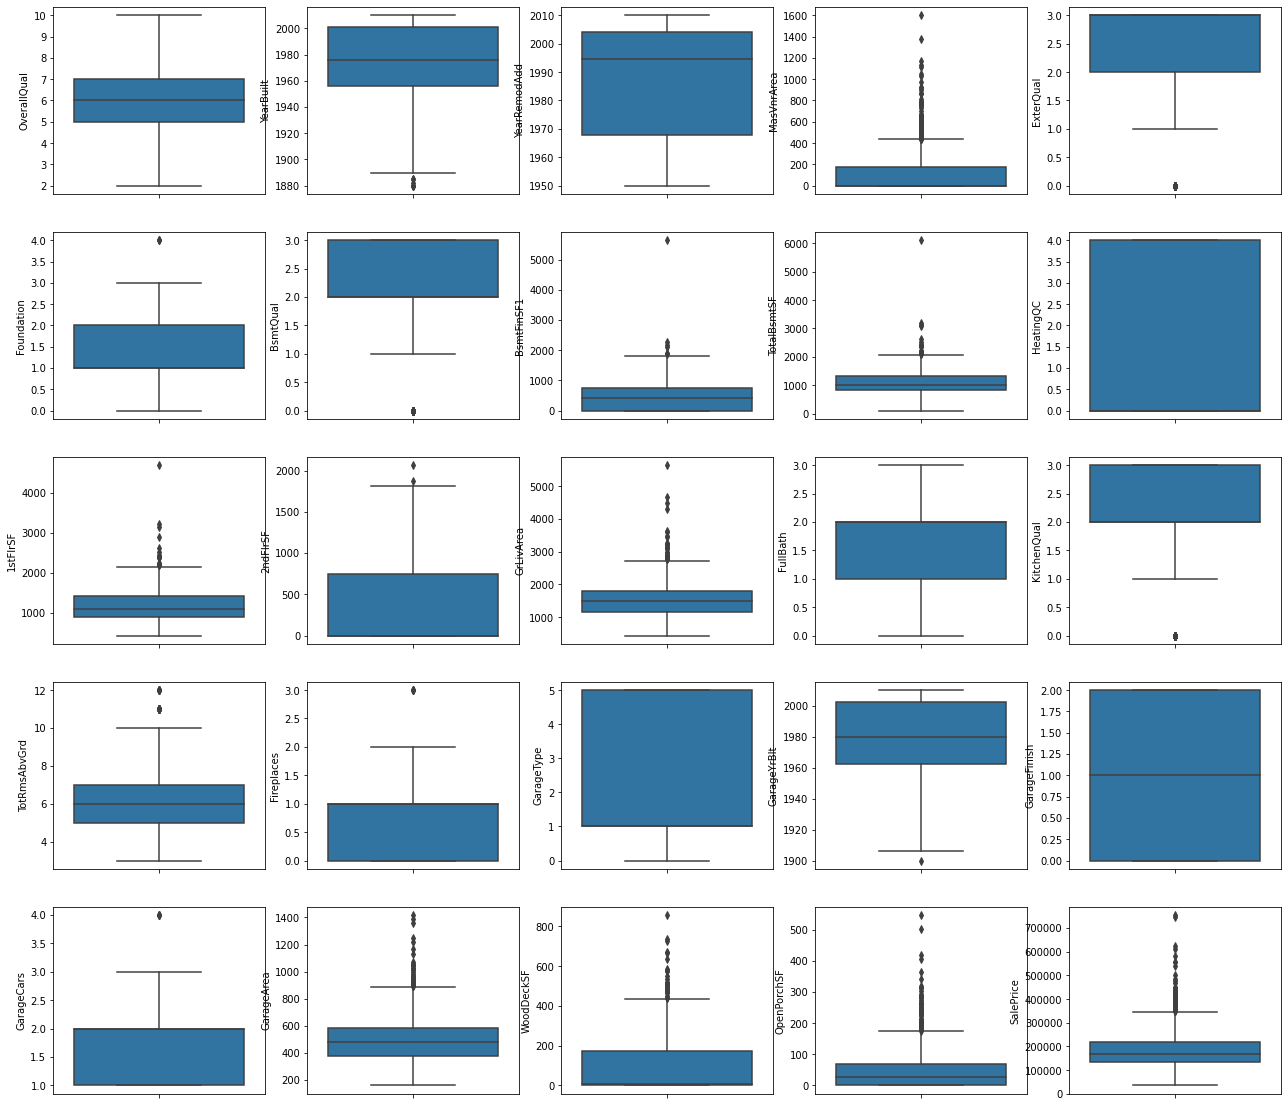

In [26]:
fig, ax = plt.subplots(ncols=5,nrows=5, figsize = (22,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
  sns.boxplot(y=col, data=df, ax=ax[index])
  index+=1

We see some columns have some outliers but we expect to treat them

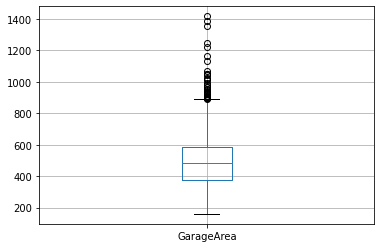

In [27]:
df.boxplot('GarageArea')

In [28]:
df = df[df.GarageArea <1000]

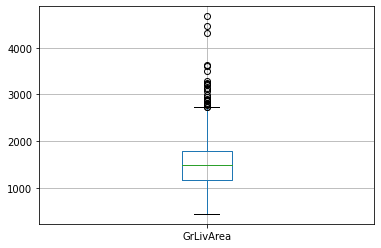

In [29]:
df.boxplot('GrLivArea')

In [30]:
df=df[df.GrLivArea<3000]

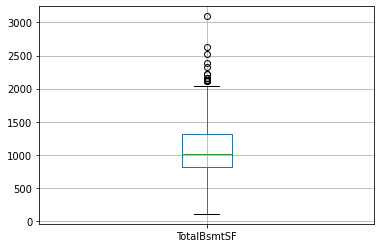

In [31]:
df.boxplot('TotalBsmtSF')

In [32]:
df=df[df.TotalBsmtSF<2000]

Checking Shape to see the new DF Dimensions after droping rows and columns.

In [33]:
df.shape

(1291, 25)

## Checking Histograms For Skewed Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadb3a3a210>,
      dtype=object)

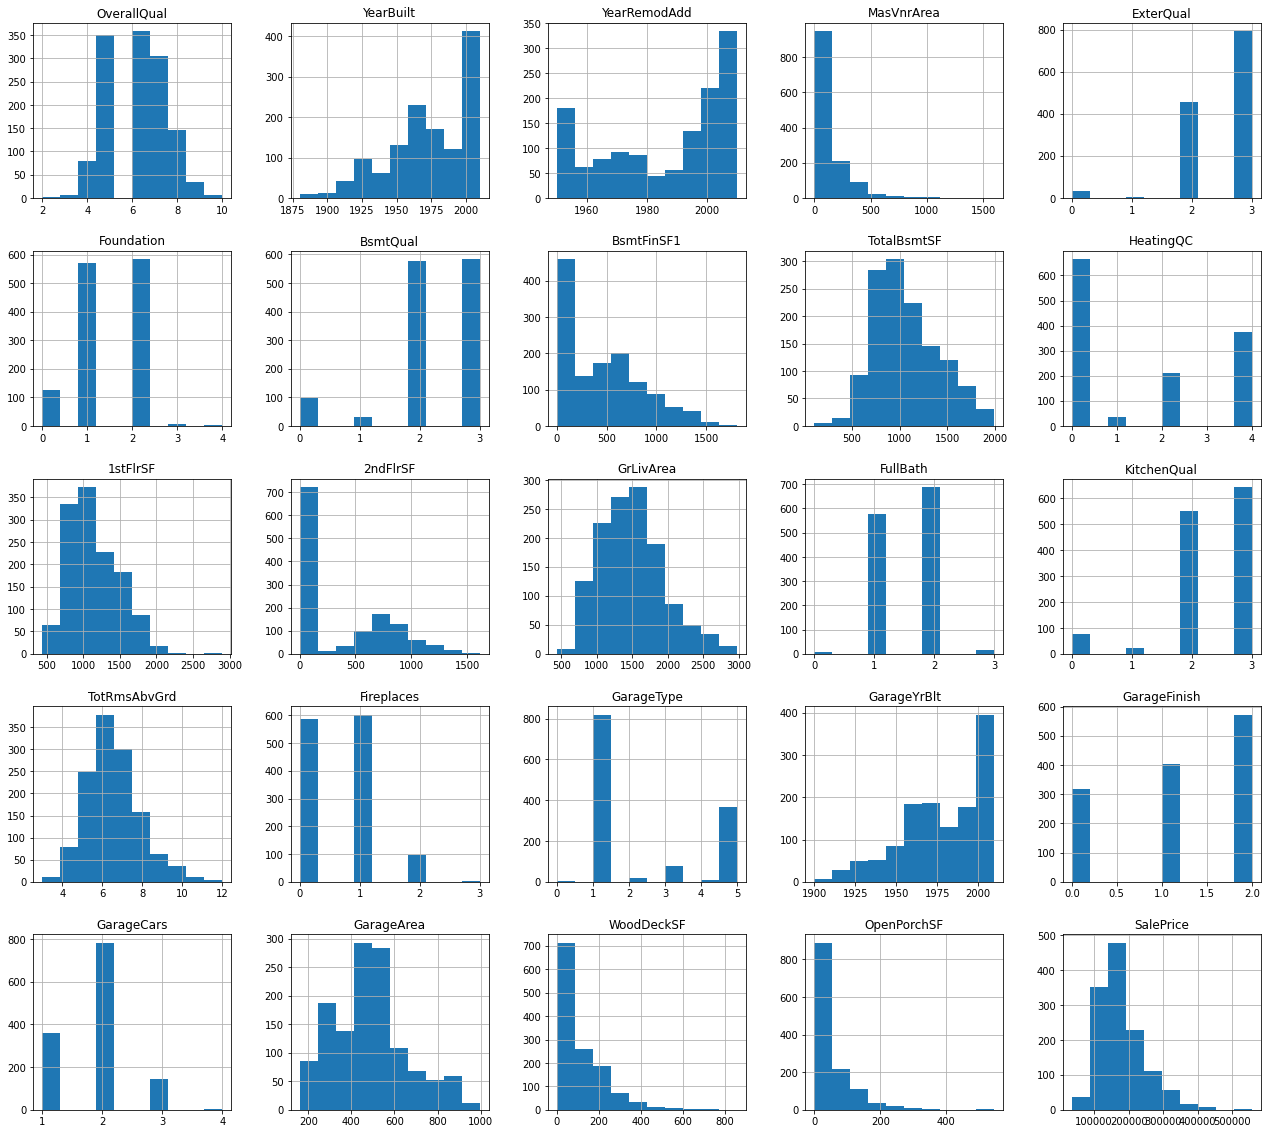

In [34]:
df.hist(figsize=(22,20))

In [35]:
for i in df.columns:
  if abs(df[i].skew())>0.5:
    print(i,df[i].skew())

YearBuilt -0.6486791868424744
YearRemodAdd -0.5382684533681956
MasVnrArea 2.5159998665744374
ExterQual -1.7424478915277075
BsmtQual -1.3248563708313121
BsmtFinSF1 0.6030293200858708
1stFlrSF 0.6051474613362104
2ndFlrSF 0.6799187113300081
GrLivArea 0.616584897816815
KitchenQual -1.4613852403991585
TotRmsAbvGrd 0.5898022276673524
Fireplaces 0.5837166906958605
GarageType 0.7677332718493073
GarageYrBlt -0.6434696475202484
WoodDeckSF 1.5424370903800733
OpenPorchSF 2.2608769220892135
SalePrice 1.2185186504010768


We see most of them are more than 1 and we need to transform them.

We need to apply log transform to SalePrice as it is highly skewed.

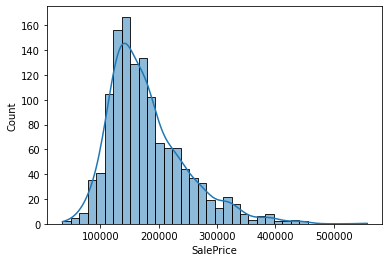

In [36]:
sns.histplot(df['SalePrice'],kde=True)

In [37]:
df['SalePrice'].skew()

1.2185186504010768

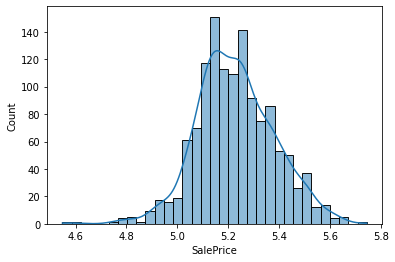

In [38]:
sns.histplot(np.log10(df['SalePrice']),kde=True)

In [39]:
np.log10(df['SalePrice']).skew()

0.05765445952183336

In [40]:
df['SalePrice'] = np.log(df['SalePrice'])

In [41]:
print(df['ExterQual'].skew())
print(np.power(df['ExterQual'],3).skew())
df['ExterQual'] = np.power(df['ExterQual'],3)

-1.7424478915277075
-0.5426462361775484


In [42]:
print(df['BsmtQual'].skew())
print(np.power(df['BsmtQual'],3).skew())
df['BsmtQual'] = np.power(df['BsmtQual'],3)

-1.3248563708313121
0.034047223273505046


In [43]:
print(df['KitchenQual'].skew())
print(np.power(df['KitchenQual'],3).skew())
df['KitchenQual'] = np.power(df['KitchenQual'],3)

-1.4613852403991585
-0.12066680775822718


In [44]:
x = df.drop('SalePrice',axis= 1)

In [45]:
y = df['SalePrice']

In [46]:
score_dict = {'Model Name':['Best Score','Test Score']}

# Linear Regression

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
score=r2_score(y_test,y_pred)

In [48]:
score_dict['Linear Regression'] = ['-',score]

# Decision Tree Regressor

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [50]:
grid_param = {'min_samples_split': range(1,100,10), 'min_samples_leaf': range(1,100,10)}

In [51]:
gd_sr = GridSearchCV(estimator = DecisionTreeRegressor(),param_grid=grid_param,scoring='r2',cv=5,n_jobs=-1)

In [52]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 100, 10),
                         'min_samples_split': range(1, 100, 10)},
             pre_dispatch='

In [53]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'min_samples_leaf': 1, 'min_samples_split': 41}


In [54]:
best_result = gd_sr.best_score_
print(best_result)

0.737149401420085


In [55]:
dtr = DecisionTreeRegressor(min_samples_split = best_parameters['min_samples_split'], min_samples_leaf = best_parameters['min_samples_leaf'])
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
score=r2_score(y_test,y_pred)

In [56]:
score_dict['Decision Tree Regressor'] = [best_result,score]

# KNighborsRegressor

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [59]:
grid_param = {'n_neighbors': range(1,15)}

In [60]:
gd_sr = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=grid_param,scoring='r2',cv=5,n_jobs=-1)

In [61]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 15)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [62]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_neighbors': 12}


In [63]:
best_result = gd_sr.best_score_
print(best_result)

0.7870364963964411


In [64]:
knnr = KNeighborsRegressor(n_neighbors=best_parameters['n_neighbors'])
knnr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

In [65]:
y_pred = knnr.predict(x_test)

In [66]:
score=r2_score(y_test,y_pred)

In [67]:
score_dict['KNighborsRegressor'] = [best_result,score]

# RandomForestRegression

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [69]:
grid_param = {'n_estimators': range(100,1000,100)}

In [70]:
gd_sr = GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid_param,scoring='r2',cv=5,n_jobs=-1)

In [71]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [72]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 500}


In [73]:
best_result = gd_sr.best_score_
print(best_result)

0.8197595201901988


In [74]:
rfc = RandomForestRegressor(n_estimators=best_parameters['n_estimators'])
rfc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
y_pred = rfc.predict(x_test)

In [76]:
score=r2_score(y_test,y_pred)

In [77]:
score_dict['RandomForestRegression'] = [best_result,score]

# XGBoost

In [78]:
data_dmatrix = DMatrix(data=x,label=y)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [80]:
grid_param = {'n_estimators': range(100,1000,100),'max_depth':range(0,10,1)}

In [81]:
gd_sr = GridSearchCV(estimator=XGBRegressor(objective ='reg:squarederror'),param_grid=grid_param,scoring='r2',cv=5,n_jobs=-1)

In [82]:
gd_sr.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(0, 10),
                         'n_estimators': range(100, 1000, 100)},
           

In [83]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 2, 'n_estimators': 200}


In [84]:
best_result = gd_sr.best_score_
print(best_result)

0.8438837179991274


In [85]:
xg_reg = XGBRegressor(objective ='reg:squarederror',n_estimators=best_parameters['n_estimators'],max_depth=best_parameters['max_depth'])

In [86]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [87]:
y_pred = xg_reg.predict(x_test)

In [88]:
score=r2_score(y_test,y_pred)

In [89]:
score_dict['XGBoost'] = [best_result,score]

In [90]:
score_table = pd.DataFrame(score_dict).T
score_table.columns = score_table.iloc[0]
score_table = score_table.drop(score_table.index[0])
score_table

Model Name,Best Score,Test Score
Linear Regression,-,0.88291
Decision Tree Regressor,0.737149,0.754093
KNighborsRegressor,0.787036,0.823118
RandomForestRegression,0.81976,0.826562
XGBoost,0.843884,0.858976
